In [5]:
# Procesamiento de datos
import pandas as pd
# Funciones algebráicas
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
## Estilos
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
# Contador
from collections import Counter
# Métodos de iteración
from itertools import product
# Machine Learning
## Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
## Separación de datos de entrenamiento
from sklearn.model_selection import train_test_split
## Preprocesamiento de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
# Modelos de clasificacion
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Modelo de máquina de soporte vectorial
from sklearn.svm import SVC
## Clasificador de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
## Clasificador de bosques aleatorios
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
## Regresión Logística
from sklearn.linear_model import LogisticRegression
## Muestreado para balancear datos
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
## Métricas
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, f1_score, make_scorer, precision_score, recall_score
## Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# módulo que proporciona soporte en tiempo de ejecución para sugerencias de tipo
from sklearn import datasets
from typing import Dict, Iterable, Any
# Desactivar los avisos
import warnings
warnings.filterwarnings('ignore')
# Importar los datos de yahoo
import yfinance as yf
# Librería para plotear mejor datos financieros
#import cufflinks as cf
#cf.set_config_file(offline = True)

He intentado escoger acciones con poca correlación. La explicación de ellas es:

AAPL: Apple Inc., uno de los fabricantes más grandes de tecnología de consumo, conocido por productos como el iPhone, el iPad y las MacBooks.

RELIANCE.NS: Reliance Industries Limited, una conglomerado multinacional indio que tiene negocios en diversos sectores como energía, petroquímicos, textiles, recursos naturales, y telecomunicaciones. El sufijo ".NS" indica que la acción se negocia en la National Stock Exchange of India.

BHP.AX: BHP Group Limited (anteriormente BHP Billiton), una de las compañías mineras y de recursos más grandes del mundo. El sufijo ".AX" indica que la acción se negocia en la Australian Securities Exchange.

SAN.MC: Banco Santander, S.A., un banco multinacional español y una de las mayores instituciones bancarias de la zona euro. El sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

REP.MC: Repsol, S.A., una empresa energética y petroquímica española. Al igual que SAN.MC, el sufijo ".MC" indica que la acción se negocia en la Bolsa de Madrid.

IBE.MC: Iberdrola, S.A., una empresa española de energía, una de las mayores productoras de energía renovable. También cotiza en la Bolsa de Madrid.

TEF.MC: Telefónica, S.A., una compañía multinacional de telecomunicaciones con sede en España. También cotiza en la Bolsa de Madrid.

Acciones con las que trabajaré: 

["AAPL", "RELIANCE.NS", "BHP.AX", "SAN.MC", "REP.MC", "IBE.MC", "TEF.MC"]

In [6]:
df = pd.read_csv("acciones_preprocesado.csv")
df

,accion,high,low,price,returns,direction,lag1,lag2,lag3,lag4,...,roll_high,year,day_of_year,week_of_year,sin_month,cos_month,sin_day,cos_day,sin_day_of_week,cos_day_of_week
0,AAPL,0.372768,0.335938,0.284963,-0.076469,-1.0,0.043894,0.029269,-0.060818,0.000000,...,0.437500,2000,298,43,-0.866025,0.5,-0.988468,0.151428,0.781831,0.623490
1,AAPL,0.342634,0.329241,0.279301,-0.020070,-1.0,-0.076469,0.043894,0.029269,-0.060818,...,0.415179,2000,299,43,-0.866025,0.5,-0.937752,0.347305,0.974928,-0.222521
2,AAPL,0.337054,0.312500,0.279301,0.000000,0.0,-0.020070,-0.076469,0.043894,0.029269,...,0.415179,2000,300,43,-0.866025,0.5,-0.848644,0.528964,0.433884,-0.900969
3,AAPL,0.342634,0.319196,0.280245,0.003373,1.0,0.000000,-0.020070,-0.076469,0.043894,...,0.415179,2000,301,43,-0.866025,0.5,-0.724793,0.688967,-0.433884,-0.900969
4,AAPL,0.356027,0.334821,0.291568,0.039610,1.0,0.003373,0.000000,-0.020070,-0.076469,...,0.415179,2000,304,44,-0.866025,0.5,-0.201299,0.979530,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41652,TEF.MC,3.776000,3.710000,3.776000,0.008778,1.0,0.015888,0.004625,0.011244,0.018089,...,3.792000,2024,54,8,0.866025,0.5,-0.998717,-0.050649,-0.433884,-0.900969
41653,TEF.MC,3.794000,3.748000,3.776000,0.000000,0.0,0.008778,0.015888,0.004625,0.011244,...,3.794000,2024,57,9,0.866025,0.5,-0.848644,0.528964,0.000000,1.000000
41654,TEF.MC,3.815000,3.751000,3.810000,0.008964,1.0,0.000000,0.008778,0.015888,0.004625,...,3.815000,2024,58,9,0.866025,0.5,-0.724793,0.688967,0.781831,0.623490
41655,TEF.MC,3.874000,3.814000,3.828000,0.004713,1.0,0.008964,0.000000,0.008778,0.015888,...,3.874000,2024,59,9,0.866025,0.5,-0.571268,0.820763,0.974928,-0.222521


Lo primero que voy a hacer es transformar la fecha para poder meterla como variable numérica 

In [4]:
df.date = pd.to_datetime(df.date)

# Extraer componentes de la fecha
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # 0 es lunes, 6 es domingo
df['day_of_year'] = df['date'].dt.dayofyear
df['week_of_year'] = df['date'].dt.isocalendar().week

# Aplicar codificación cíclica para mes y día de la semana
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
df['sin_day'] = np.sin(2 * np.pi * df['day']/31)
df['cos_day'] = np.cos(2 * np.pi * df['day']/31)
df['sin_day_of_week'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['cos_day_of_week'] = np.cos(2 * np.pi * df['day_of_week']/7)

# elimino la columna date porque ya la he procesado y la fecha como tal no se puede meter en el modelo
# elimino las otras variables que he transformado con seno y coseno para el tema de los ciclos naturales 
df.drop(["date", "month", "day", "day_of_week"], axis = 1, inplace = True)

df

AttributeError: 'DataFrame' object has no attribute 'date'

Ahora voy a separar los data frames en:
1.- variables categóricas para hacerle onehotencoding
2.- variables numéricas para aplicarle escaladores
3.- variables seno y cosenoidales que no se transforman ya más
4.- variable objetivo (dirección)

In [7]:
df_cat = df[["accion"]].copy()
columns_to_copy = [col for col in df.columns if col.startswith('sin') or col.startswith('cos')]
df_sincos = df[columns_to_copy].copy()
columns_to_exclude = columns_to_copy + ["accion", "direction"]
columns_to_select = [col for col in df.columns if col not in columns_to_exclude]
df_num = df[columns_to_select].copy()
df_dir = df[["direction"]].copy()

Empiezo haciendo one hot encoding sobre la única variable tipo texto que tengo. El nombre de la acción

In [8]:
df_num.describe()

,high,low,price,returns,lag1,lag2,lag3,lag4,lag5,sma200,sma_lower200,sma_upper200,ema_s,ema_l,roll_low,roll_high,year,day_of_year,week_of_year
count,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000,41657.000000
mean,113.817012,111.198921,104.550264,0.000393,0.000392,0.000391,0.000387,0.000389,0.000385,97.932764,80.337977,115.527551,104.135992,103.623553,106.274867,117.712044,2011.936721,183.459179,26.623833
std,364.780828,357.035220,357.586393,0.020363,0.020374,0.020379,0.020384,0.020385,0.020388,335.068810,284.555374,388.533308,355.943572,353.974493,342.354450,375.699867,6.769532,105.731326,15.101813
min,0.235536,0.227143,0.198078,-0.776289,-0.776289,-0.776289,-0.776289,-0.776289,-0.776289,0.222474,-0.042560,0.243368,0.204907,0.209698,0.227143,0.257857,2000.000000,1.000000,1.000000
25%,6.572000,6.439327,3.500777,-0.009074,-0.009075,-0.009075,-0.009079,-0.009079,-0.009081,3.428282,2.745340,4.110720,3.508376,3.505900,6.165380,6.779000,2006.000000,91.000000,13.000000
50%,13.030720,12.763778,6.381727,0.000345,0.000346,0.000346,0.000342,0.000346,0.000337,6.360361,5.090503,7.711731,6.370497,6.365182,12.339062,13.450000,2012.000000,184.000000,27.000000
75%,29.645367,29.195000,15.947636,0.009999,0.010004,0.010013,0.010013,0.010017,0.010017,15.273707,12.882135,17.796128,15.911088,15.823162,28.056183,30.638929,2018.000000,276.000000,40.000000
max,2999.899902,2966.699951,2987.250000,0.782708,0.782708,0.782708,0.782708,0.782708,0.782708,2486.273513,2161.673153,2885.638175,2943.460843,2884.928860,2884.699951,2999.899902,2024.000000,366.000000,53.000000


In [9]:
# drop_first para evitar la colinealidad
df_cat = pd.get_dummies(df_cat, columns=["accion"], drop_first = True).astype(int)
df_cat 


,accion_BHP.AX,accion_IBE.MC,accion_RELIANCE.NS,accion_REP.MC,accion_SAN.MC,accion_TEF.MC
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
41652,0,0,0,0,0,1
41653,0,0,0,0,0,1
41654,0,0,0,0,0,1
41655,0,0,0,0,0,1


Ahora aplico escaladores sobre las variables numéricas

MinMax Scaler


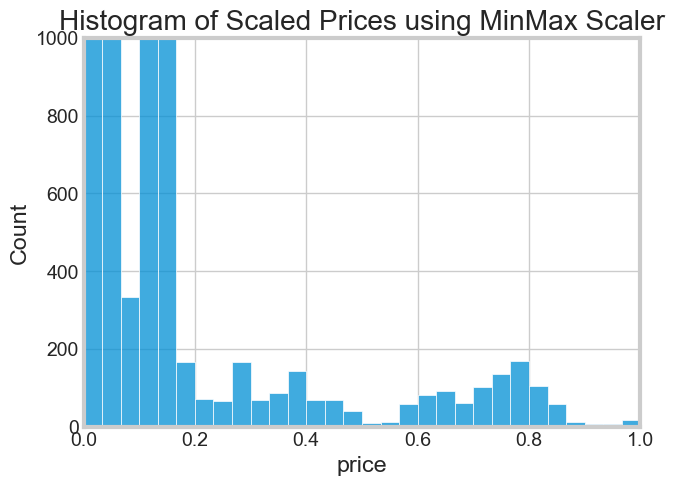

Standard Scaler


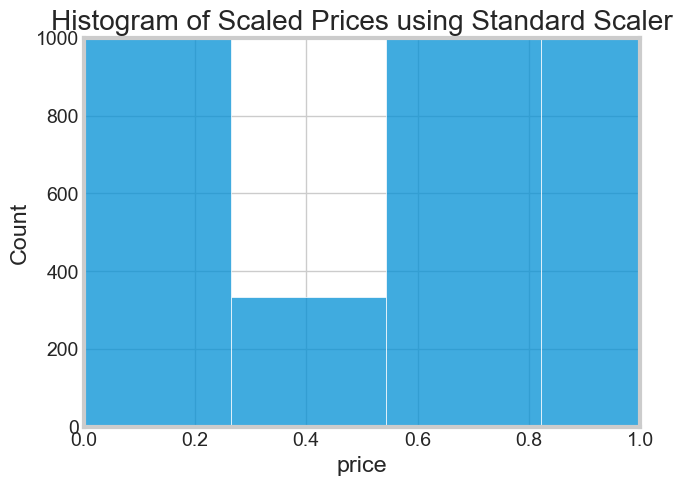

MaxAbs Scaler


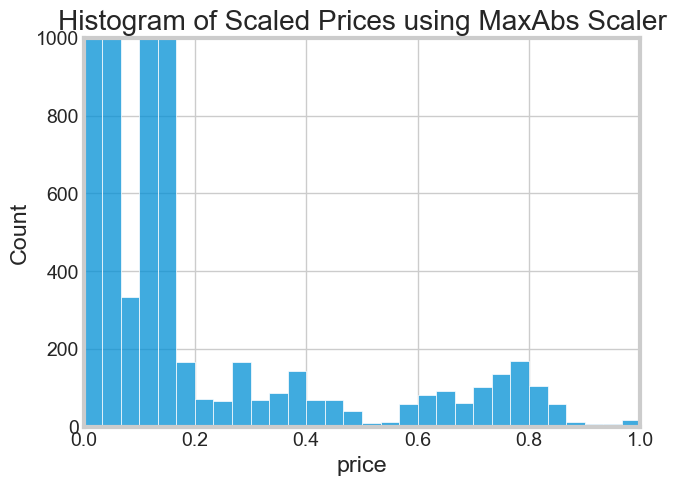

Robust Scaler


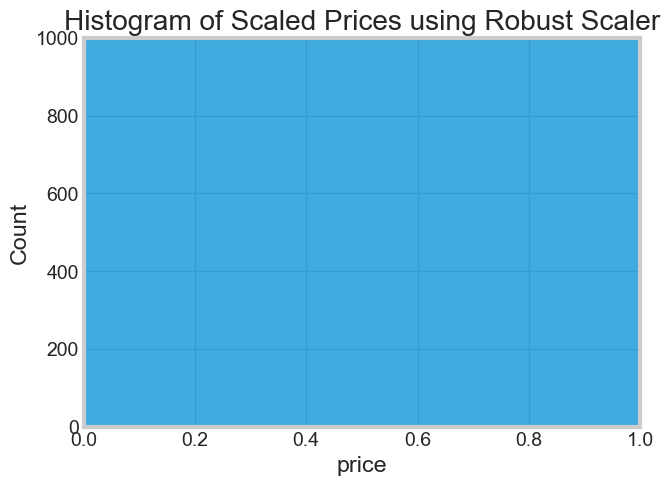

Quant-Normal


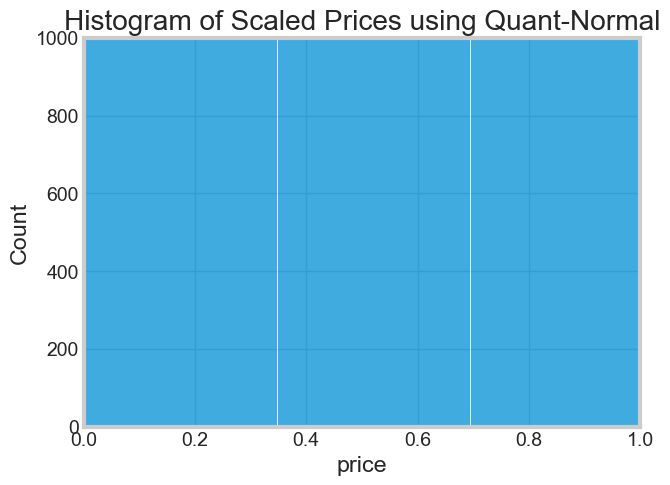

Quant-Uniform


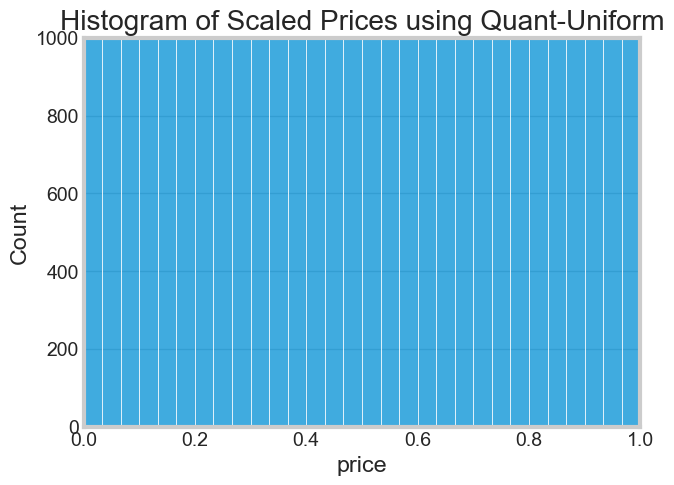

PowerTransf-YeoJohnson


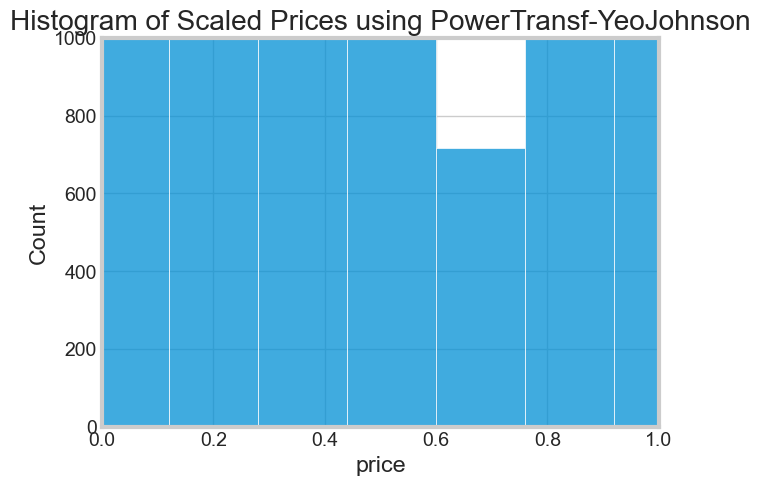

In [20]:

for scaler_name, scaler in scalers.items():
    df_scaled = df[['price']].copy()
    scaled_data = scaler.fit_transform(df_scaled)
    print(scaler_name)
    df_scaled = pd.DataFrame(scaled_data, columns=['price'])

    fig, ax = plt.subplots()
    sns.histplot(df_scaled['price'], bins=30, ax=ax)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1000)
    ax.set_title(f'Histogram of Scaled Prices using {scaler_name}')
    plt.show()

Ahora ya tengo el df de categóricas con onehotencoding y las numéricas con los datos escalados. Por tanto los quiero volver a unir y juntar también con las variables seno y cosenoidales. Y tener solo separada la variable objetivo

In [43]:
# por otra parte me guardo la variable objetivo en este dataframe y veo que está balanceado pero que tiene algunos 0, 
# no se bien que hacer con ellos. Significa que la diferencia de precio de un día a otro ha sido 0
df_dir.direction.value_counts()

direction
 1.0    21028
-1.0    19772
 0.0      857
Name: count, dtype: int64

Ahora vamos a entrenar un modelo solo para ver que tal funciona, si me das el ok Alejandro intento meterle un bucle para que pruebe distintos modelos y distintos escaladores. De momento hago la prueba con logistic regression.

In [10]:
scalers = {
    # Se descartan estos escaladores por la distribución de los datos
    
    "MinMax Scaler": MinMaxScaler(),
    "Standard Scaler": StandardScaler(),
    "MaxAbs Scaler": MaxAbsScaler(),
    "Robust Scaler": RobustScaler(),
    "Quant-Normal": QuantileTransformer(output_distribution="normal"),
    "Quant-Uniform": QuantileTransformer(output_distribution="uniform"),
    "PowerTransf-YeoJohnson": PowerTransformer(method='yeo-johnson')
}


# Define classification models
models = {
    "SVC": SVC(gamma="auto", C=10000),
    "Logistic Regression": LogisticRegression(penalty="l2"),
    "KNeighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "MLP": MLPClassifier(tol=0.05, max_iter=1000),
    "Gaussian Process Classifier": GaussianProcessClassifier(), # tarda mucho este? comprobar
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators=100),
    "Bagging Classifier": BaggingClassifier(estimator=SVC(), n_estimators=10)
}

In [48]:

# Configurar el método de validación cruzada
cv = StratifiedKFold(n_splits=5)

# Diccionario de métricas de scoring
scoring = {'accuracy': 'accuracy'}

# DataFrame para guardar los resultados finales
results = pd.DataFrame()
df_dir = df_dir[-2000:].copy()
# Bucle para cada escalador
for scaler_name, scaler in scalers.items():
    # Aplicar el escalador a los datos
    X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns = df_num.columns)
    X_scaled = X_scaled.drop(columns="returns").copy()
    df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)
    df_variables = df_variables[-2000:].copy()
    for model_name, model in models.items():
        # Ejecutar cross_validate
        cv_results = cross_validate(model, df_variables, df_dir, cv=cv, scoring=scoring)
        # Calcular la media de las precisiones de validación cruzada
        mean_accuracy = cv_results['test_accuracy'].mean()
        # Guardar los resultados en el DataFrame
        temp_df = pd.DataFrame({
            'Scaler': [scaler_name],
            'Model': [model_name],
            'Accuracy': [mean_accuracy]
        })
        # Concatenar el resultado al DataFrame de resultados
        results = pd.concat([results, temp_df], ignore_index=True)
        print(scaler_name, ", ", model_name, ": ", mean_accuracy)

# Reorganizar el DataFrame para una mejor visualización
results = results.pivot(index='Scaler', columns='Model', values='Accuracy')
results.index.name = None
results.columns.name = None
results.style.highlight_max(color='green', axis=0)

Quant-Normal ,  SVC :  0.571
Quant-Normal ,  Logistic Regression :  0.6125
Quant-Normal ,  KNeighbors Classifier :  0.49049999999999994
Quant-Normal ,  Decision Tree Classifier :  0.387
Quant-Normal ,  GaussianNB :  0.35900000000000004
Quant-Normal ,  Random Forest Classifier :  0.4665
Quant-Normal ,  MLP :  0.5165
Quant-Normal ,  Gaussian Process Classifier :  0.496
Quant-Normal ,  Ada Boost Classifier :  0.409
Quant-Normal ,  Bagging Classifier :  0.5155000000000001
Quant-Uniform ,  SVC :  0.6359999999999999
Quant-Uniform ,  Logistic Regression :  0.5429999999999999
Quant-Uniform ,  KNeighbors Classifier :  0.488
Quant-Uniform ,  Decision Tree Classifier :  0.3625
Quant-Uniform ,  GaussianNB :  0.3755
Quant-Uniform ,  Random Forest Classifier :  0.48650000000000004
Quant-Uniform ,  MLP :  0.5205
Quant-Uniform ,  Gaussian Process Classifier :  0.5035000000000001
Quant-Uniform ,  Ada Boost Classifier :  0.409
Quant-Uniform ,  Bagging Classifier :  0.521
PowerTransf-YeoJohnson ,  SVC : 

,Ada Boost Classifier,Bagging Classifier,Decision Tree Classifier,Gaussian Process Classifier,GaussianNB,KNeighbors Classifier,Logistic Regression,MLP,Random Forest Classifier,SVC
PowerTransf-YeoJohnson,0.408000,0.521500,0.370500,0.501000,0.388000,0.506000,0.609500,0.519500,0.493500,0.609500
Quant-Normal,0.409000,0.515500,0.387000,0.496000,0.359000,0.490500,0.612500,0.516500,0.466500,0.571000
Quant-Uniform,0.409000,0.521000,0.362500,0.503500,0.375500,0.488000,0.543000,0.520500,0.486500,0.636000


QuantileTransformer (Uniform), Logistic Regression:  0.479774616297268


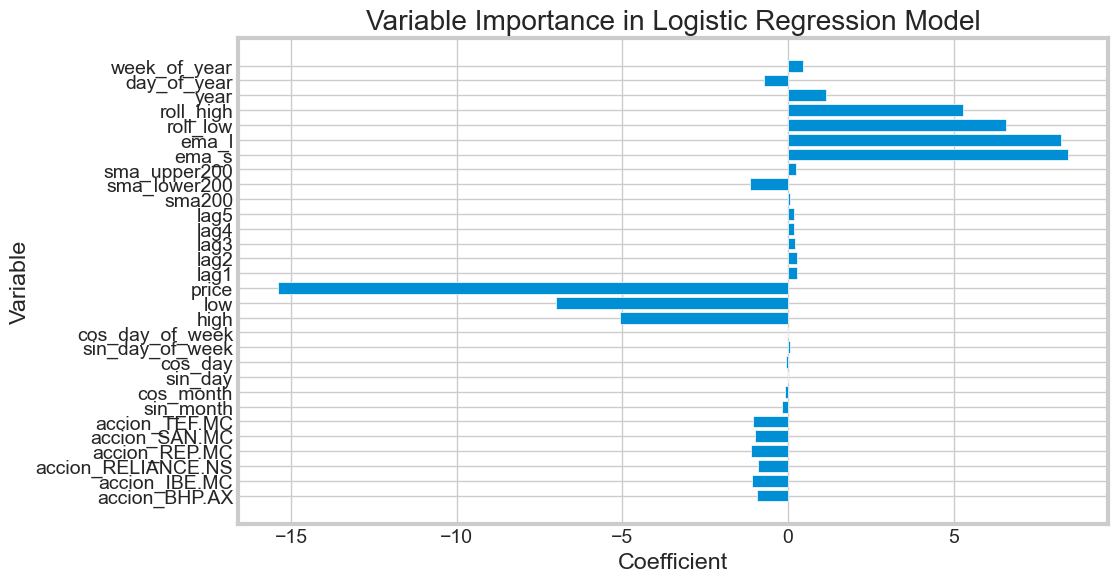

In [47]:


# Configurar el método de validación cruzada
cv = StratifiedKFold(n_splits=5)

# Diccionario de métricas de scoring
scoring = {'accuracy': 'accuracy'}

# DataFrame para guardar los resultados finales
results = pd.DataFrame()

# Definir el escalador
scaler = QuantileTransformer(output_distribution='uniform')

# Aplicar el escalador a los datos
X_scaled = pd.DataFrame(scaler.fit_transform(df_num.copy()), columns=df_num.columns)

# Eliminar la columna 'price' si está presente
X_scaled = X_scaled.drop(columns="returns").copy()

# Combinar las variables escaladas con las otras variables
df_variables = pd.concat([df_cat, df_sincos, X_scaled], axis=1)

# Definir el modelo
model = LogisticRegression()

# Ejecutar cross_validate para obtener métricas de validación
cv_results = cross_validate(model, df_variables, df_dir, cv=cv, scoring=scoring)

# Calcular la media de las precisiones de validación cruzada
mean_accuracy = cv_results['test_accuracy'].mean()

# Guardar los resultados en el DataFrame
results = pd.DataFrame({
    'Scaler': ['QuantileTransformer (Uniform)'],
    'Model': ['Logistic Regression'],
    'Accuracy': [mean_accuracy]
})

print("QuantileTransformer (Uniform), Logistic Regression: ", mean_accuracy)

# Entrenar el modelo completo en todos los datos para obtener los coeficientes
model.fit(df_variables, df_dir)

# Obtener los coeficientes del modelo entrenado
coefficients = model.coef_[0]

# Crear un DataFrame con los nombres de las variables y sus respectivos coeficientes
coef_df = pd.DataFrame({
    'Variable': df_variables.columns,
    'Coefficient': coefficients
})

# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Variable'], coef_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Variable Importance in Logistic Regression Model')
plt.show()
